In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the csv file/data
df = pd.read_csv("SaYoPillow.csv")

# Display the first 5 rows of the dataset
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
# Display the columns in our dataset
# Column Descriptions:
#'sr' or 'snoring_rate': The rate or intensity of snoring during sleep
#'rr' or 'respiration_rate': # of breaths taken per minute during sleep
#'t' or 'body_temperature': Body temperature of person during sleep, possibly measured in degrees Celsius or Fahrenheit
#'lm' or 'limb_movement': The rate or intensity of limb movement during sleep, indicating how active/restless the person is
#'bo' or 'blood_oxygen': The blood oxygen level/amount of oxygen in blood during sleep
#'rem' or 'eye_movement': The eye movement activity during sleep (REM phase of sleep)
#'sr.1' or 'sleeping_hours': The number of hours slept during a particular sleep session
#'hr' or 'heart_rate': The number of heartbeats per minute during sleep
#'sl' or 'stress_level': The target variable representing the stress level during sleep

df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [4]:
# Rename columns based on above
df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
# Check if null values present in df
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [6]:
df.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [7]:
# See distribution for target variable (stress level)
df['stress_level'].value_counts()

stress_level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64

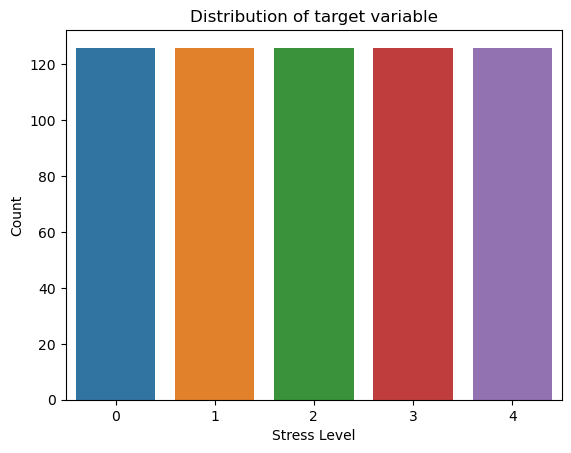

In [8]:
sns.countplot(x='stress_level', data=df)
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of target variable')

# Displaying the plot of distribution of target
plt.show()

# Exploratory data analysis

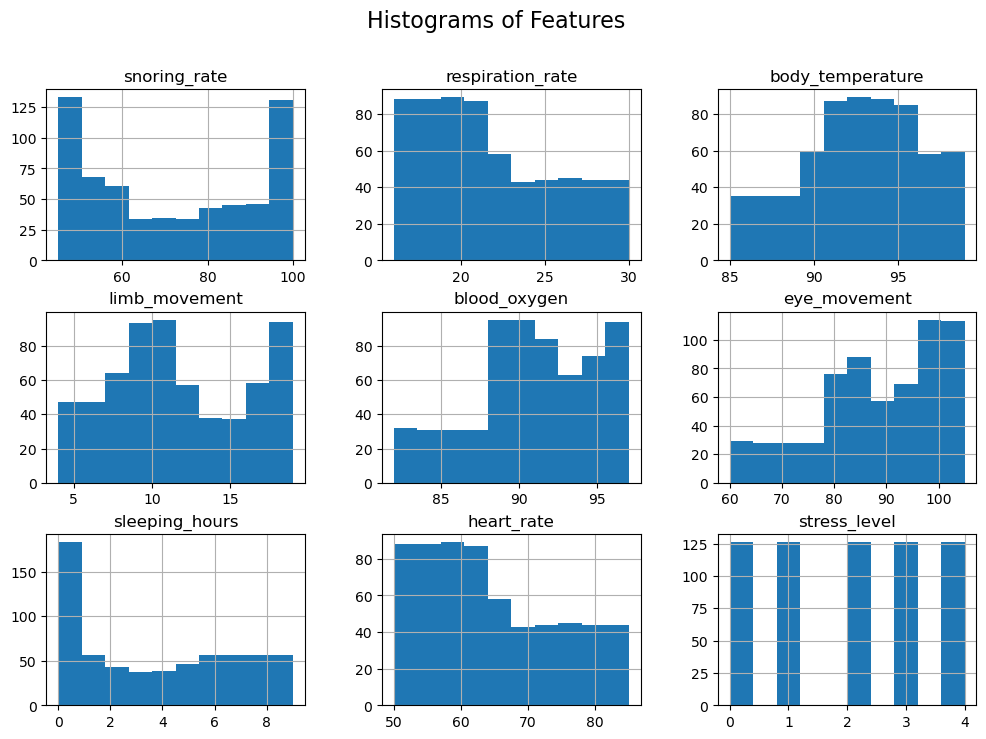

In [9]:
# Find relationship between all the different features and our target variable (stress level)

# Histograms for features
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

/home/sophia/anaconda3/envs/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


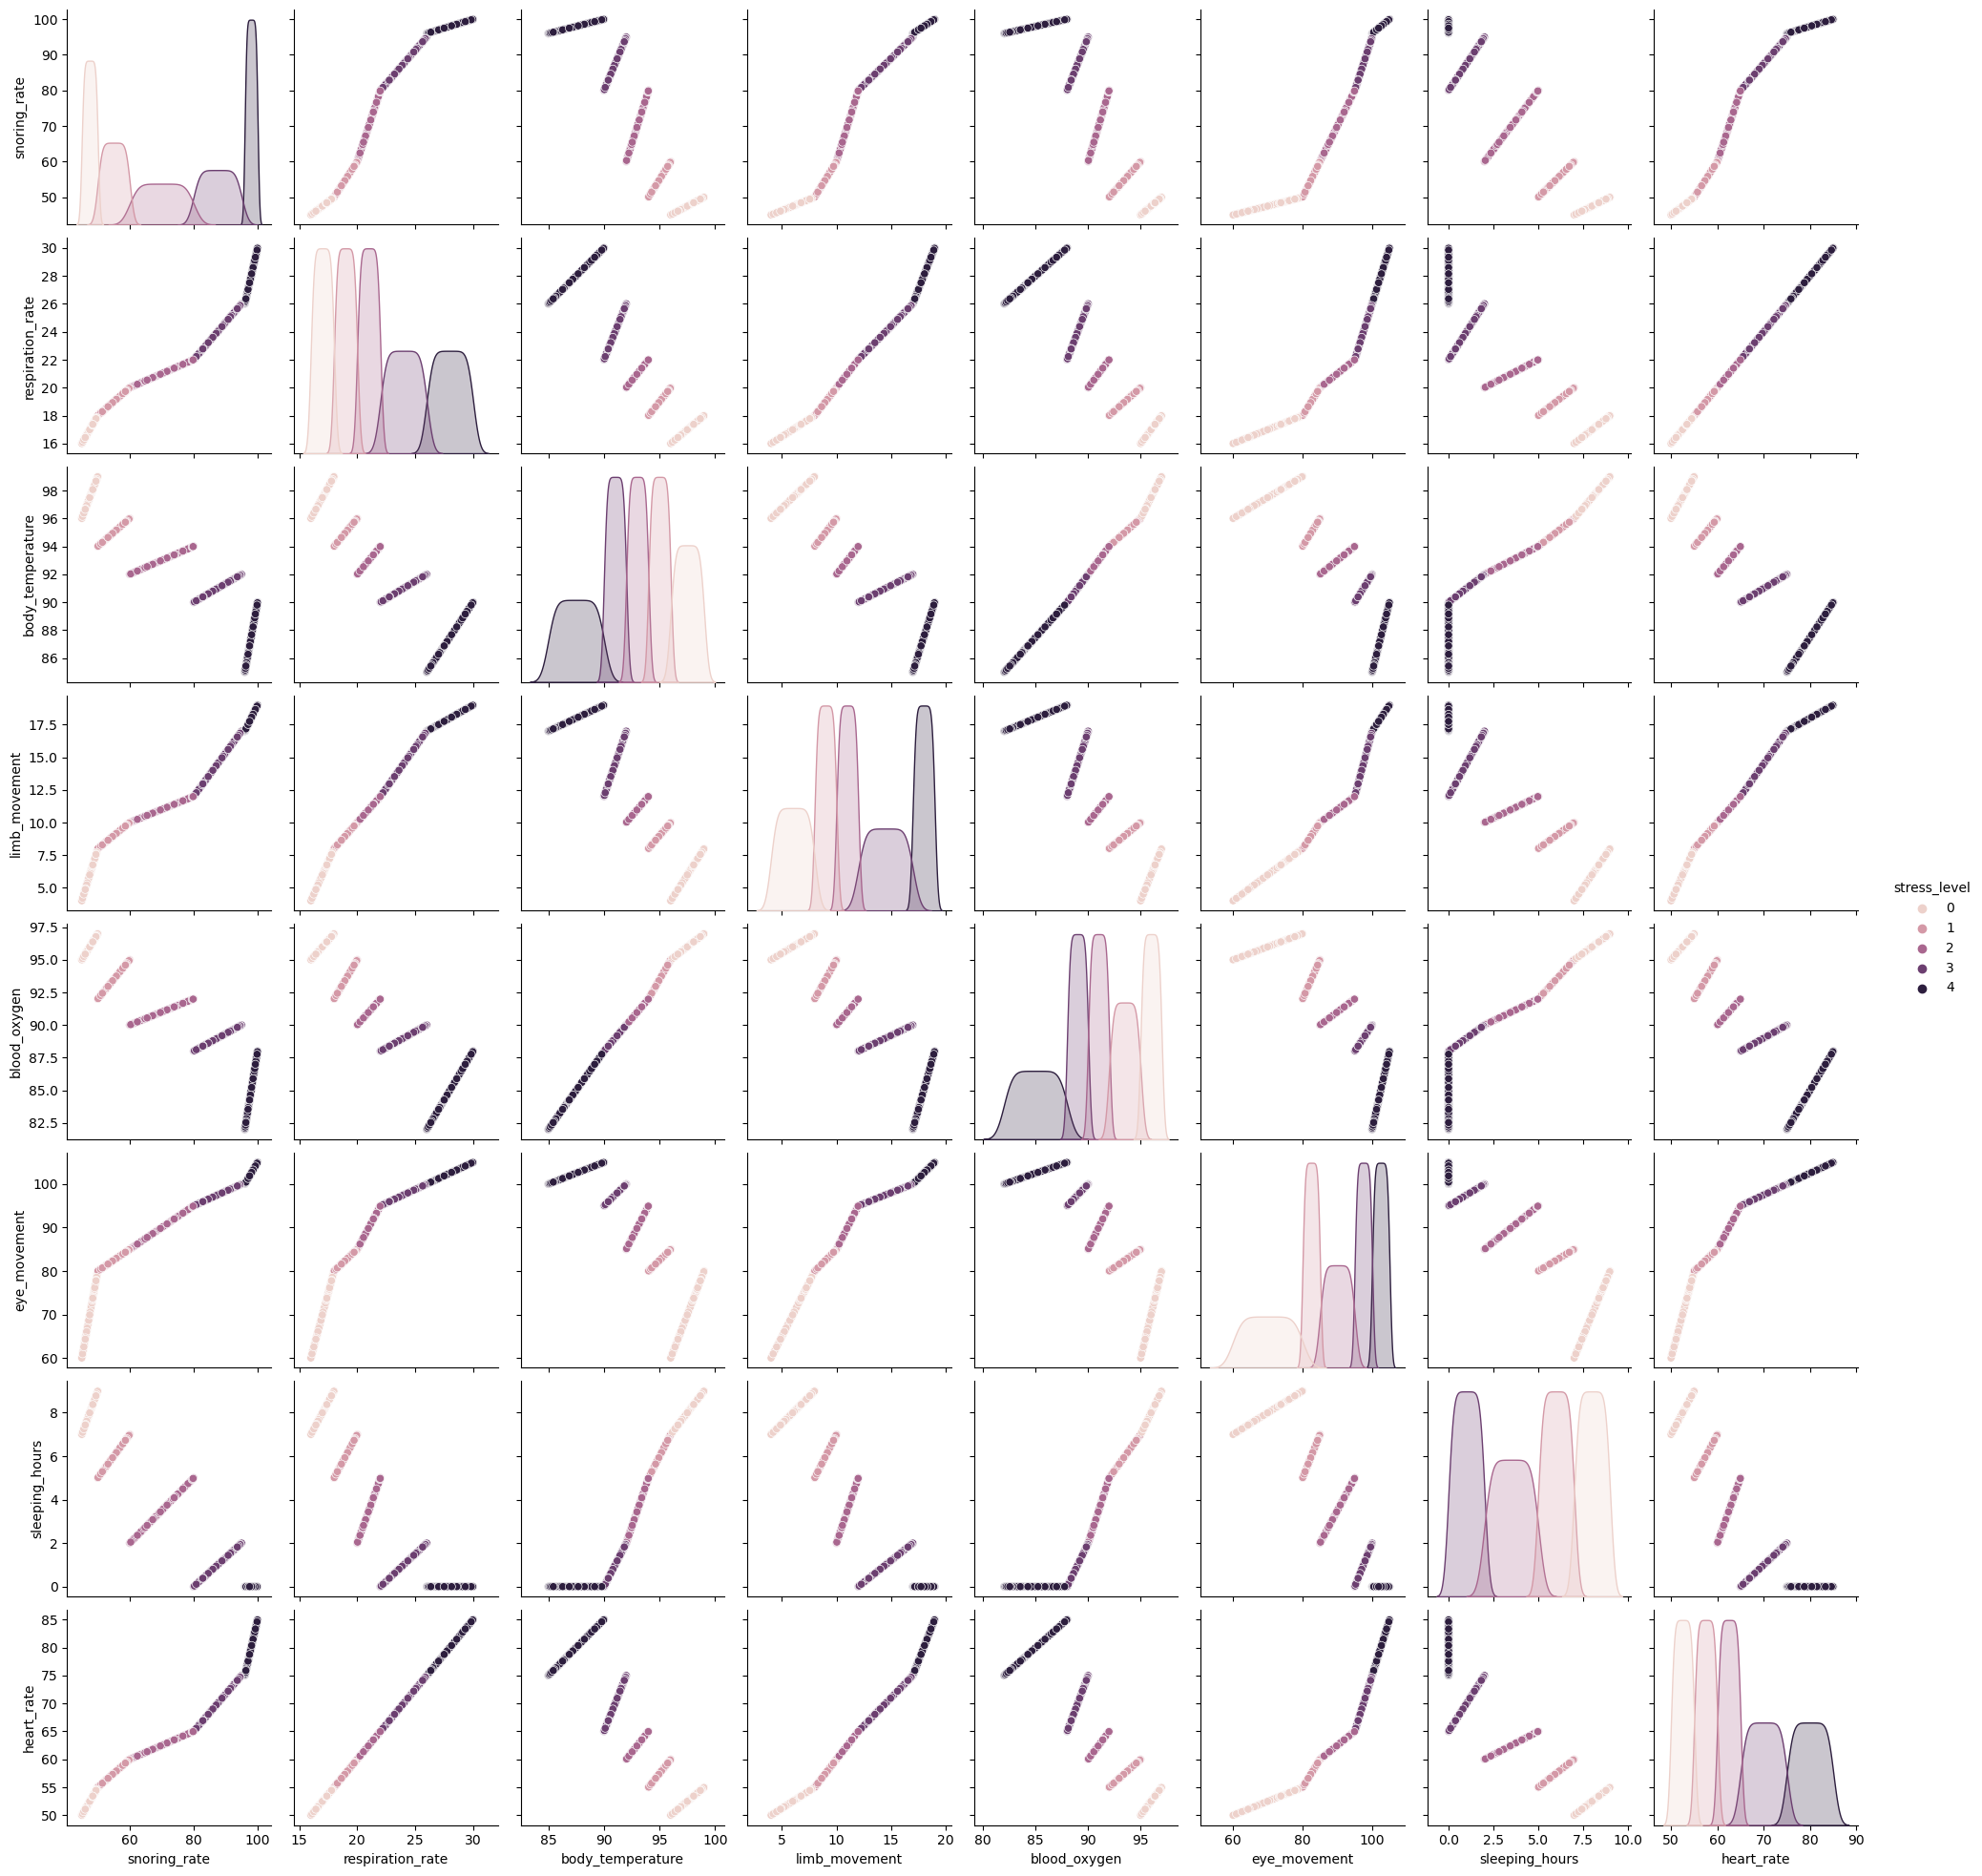

In [10]:
sns.pairplot(df, hue="stress_level")

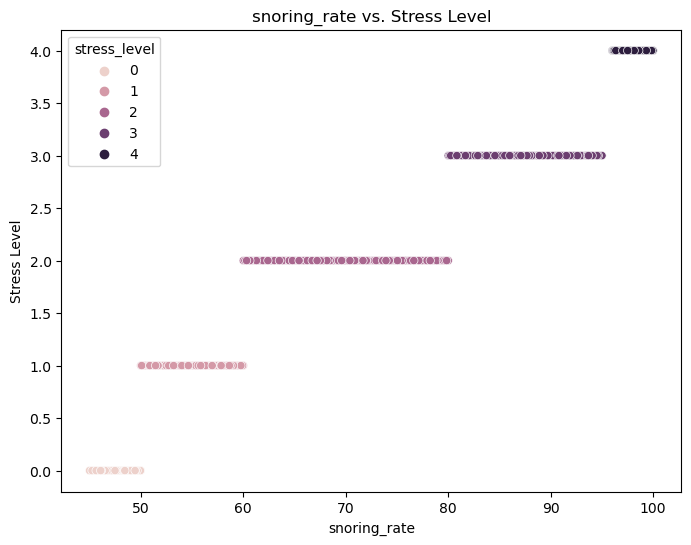

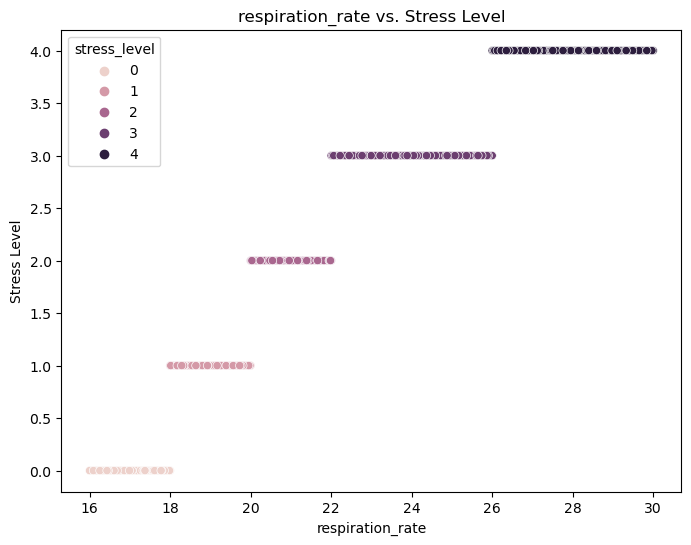

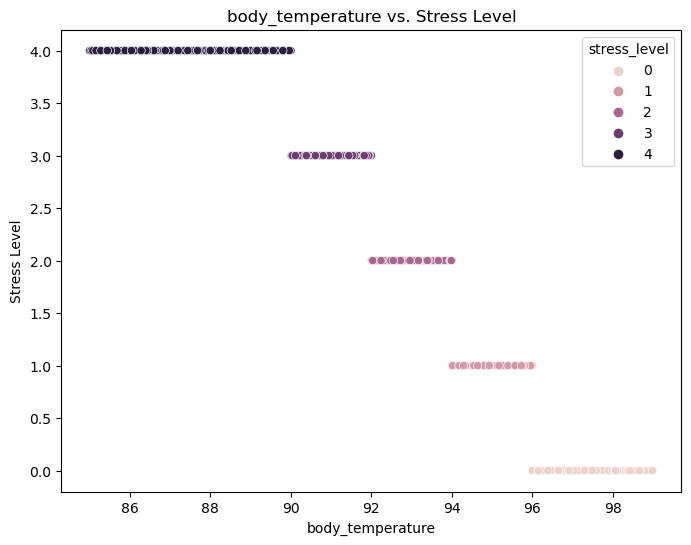

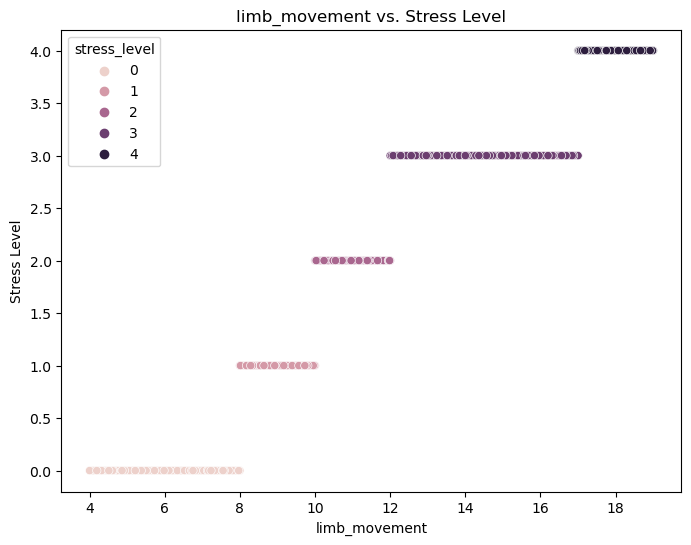

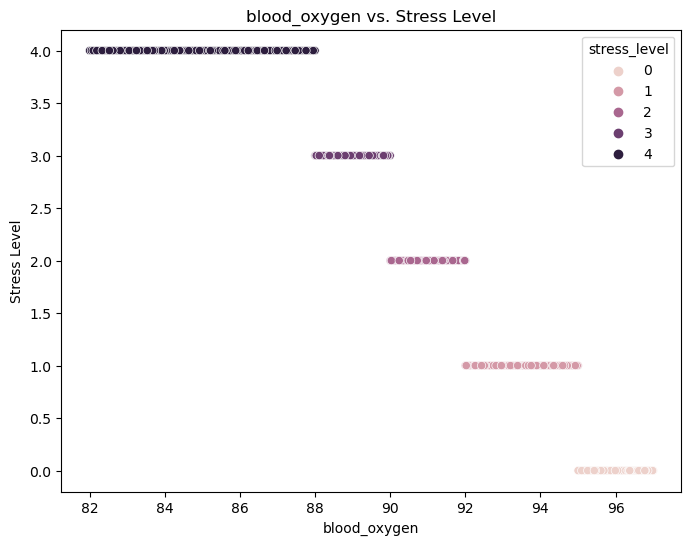

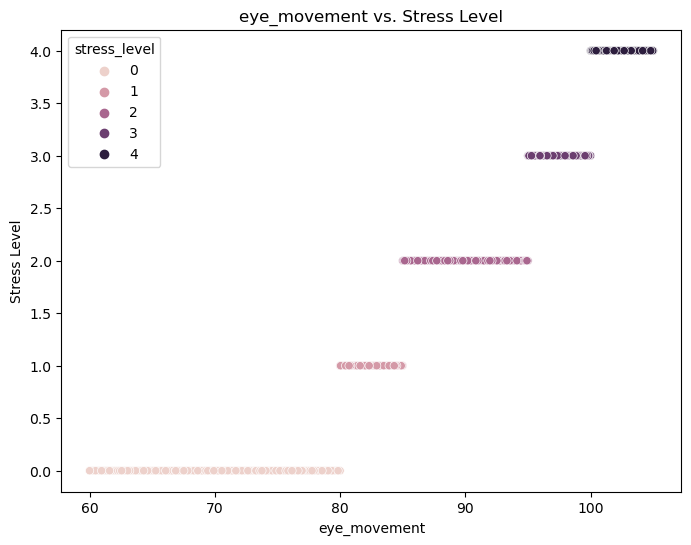

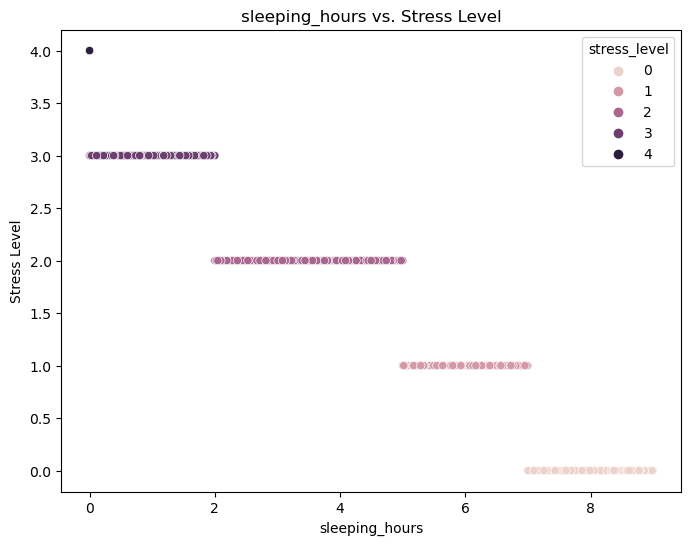

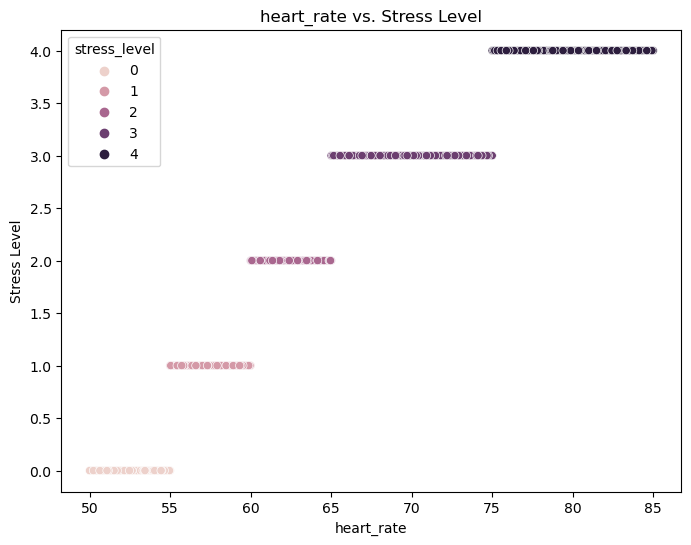

In [11]:
# Zoom in: Scatter plots for each feature against 'stress_level'
for feature in df.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='stress_level', hue='stress_level')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

In [96]:
# Look for correlations between features and target
corr_matrix = df.corr()
corr_matrix["stress_level"].sort_values(ascending = False)

# Clearly all the features have strong correlations with the target variable

stress_level        1.000000
snoring_rate        0.975322
limb_movement       0.971071
heart_rate          0.963516
respiration_rate    0.963516
eye_movement        0.951988
blood_oxygen       -0.961092
body_temperature   -0.962354
sleeping_hours     -0.973036
Name: stress_level, dtype: float64

# Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['stress_level'], axis=1)
y = df['stress_level']

In [15]:
# 80-20 split between train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


In [16]:
X_train

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
335,46.240,16.496,96.744,4.992,95.496,64.96,7.496,51.24
6,47.000,16.800,97.200,5.600,95.800,68.00,7.800,52.00
104,53.520,18.704,94.704,8.704,93.056,81.76,5.704,56.76
114,66.880,20.688,92.688,10.688,90.688,88.44,3.032,61.72
533,59.920,19.984,95.984,9.984,94.976,84.96,6.984,59.96
...,...,...,...,...,...,...,...,...
71,96.192,26.192,85.240,17.096,82.288,100.24,0.000,75.48
106,62.240,20.224,92.224,10.224,90.224,86.12,2.336,60.56
270,98.848,28.848,88.560,18.424,86.272,103.56,0.000,82.12
435,72.800,21.280,93.280,11.280,91.280,91.40,3.920,63.20


# Feature Scaling

In [17]:
# Ensure all features are on the same scale (feature scaling)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[2.25454545e-02, 3.54285714e-02, 8.38857143e-01, ...,
        1.10222222e-01, 8.32888889e-01, 3.54285714e-02],
       [3.63636364e-02, 5.71428571e-02, 8.71428571e-01, ...,
        1.77777778e-01, 8.66666667e-01, 5.71428571e-02],
       [1.54909091e-01, 1.93142857e-01, 6.93142857e-01, ...,
        4.83555556e-01, 6.33777778e-01, 1.93142857e-01],
       ...,
       [9.79054545e-01, 9.17714286e-01, 2.54285714e-01, ...,
        9.68000000e-01, 0.00000000e+00, 9.17714286e-01],
       [5.05454545e-01, 3.77142857e-01, 5.91428571e-01, ...,
        6.97777778e-01, 4.35555556e-01, 3.77142857e-01],
       [7.27272727e-04, 1.14285714e-03, 7.87428571e-01, ...,
        3.55555556e-03, 7.79555556e-01, 1.14285714e-03]])

# Principal Component Analysis (PCA)

In [19]:
# Try PCA to reduce dimensionality of data (large number of features)
from sklearn.decomposition import PCA

# Choose the number of components
n_components = 2

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


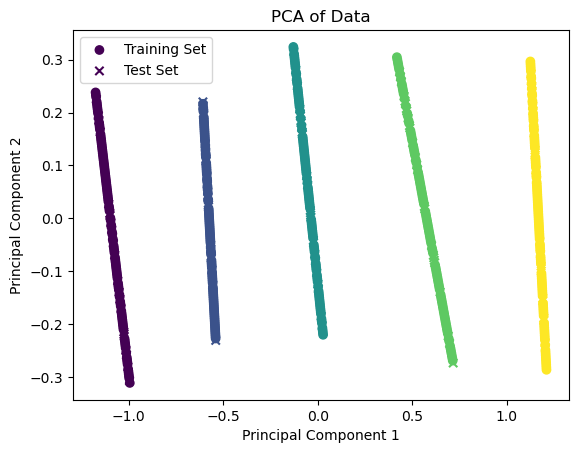

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='x', label='Test Set')

plt.title('PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Each color represents the classes/stress levels (0-4 from left to right)

In [126]:
# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# Display the top contributing features for PC1
print("Top contributing features for PC1:")
print(loadings_df['PC1'].sort_values(ascending=False))

# Display the top contributing features for PC2
print("\nTop contributing features for PC2:")
print(loadings_df['PC2'].sort_values(ascending=False))

Top contributing features for PC1:
snoring_rate        0.433164
limb_movement       0.354371
heart_rate          0.347798
respiration_rate    0.347798
eye_movement        0.318128
body_temperature   -0.295401
blood_oxygen       -0.305431
sleeping_hours     -0.403867
Name: PC1, dtype: float64

Top contributing features for PC2:
snoring_rate       -0.225971
eye_movement       -0.240863
limb_movement      -0.274659
respiration_rate   -0.286413
heart_rate         -0.286413
body_temperature   -0.447027
blood_oxygen       -0.449901
sleeping_hours     -0.499175
Name: PC2, dtype: float64


In [127]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 2)
y_train shape: (504,)
X_test shape: (126, 2)
y_test shape: (126,)


# Model Training

## 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression classifier
# max_iter parameter = 1000: determines the max number of iterations for convergence
# The C parameter is set to 0.1: controls the regularization strength (helps to avoid overfitting)
log_reg = LogisticRegression(max_iter=1000, C=0.1)

In [26]:
# Use cross validation to get validation set and see model accuracy
from sklearn.model_selection import cross_val_score, KFold

# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring="accuracy")

In [27]:
np.mean(accuracies)

0.972078431372549

In [28]:
# Now just try fitting model with train data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [29]:
log_reg.score(X_test, y_test)

0.9920634920634921

In [30]:
y_pred = log_reg.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

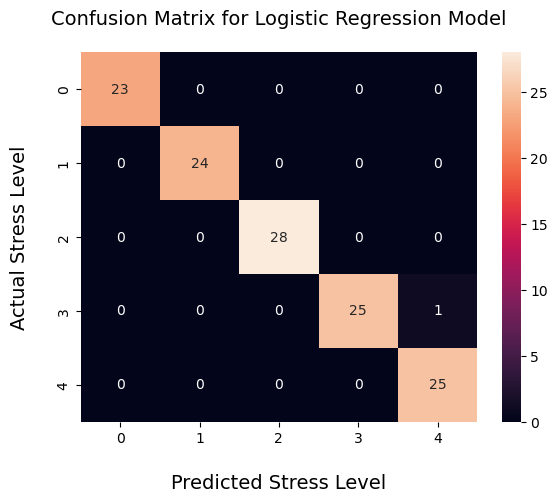

In [31]:
# Print confusion matrix using predicted
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for Logistic Regression Model", fontsize=14, pad=20)

In [32]:
# Display classification report: f1 score, recall, precision...
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



## 2. Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [34]:
# Use cross validation to get validation set and see model accuracy
from sklearn.model_selection import cross_val_score, KFold

# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(nb, X_train, y_train, cv=kf, scoring="accuracy")

In [35]:
np.mean(accuracies)

1.0

In [36]:
# Now just try fitting model with train and test data
nb.fit(X_train, y_train)

GaussianNB()

In [37]:
nb.score(X_test, y_test)

1.0

In [38]:
y_pred = nb.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Model')

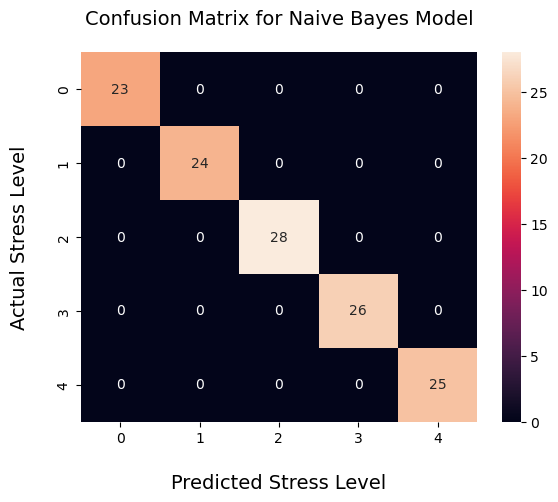

In [39]:
# Print confusion matrix using predicted
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for Naive Bayes Model", fontsize=14, pad=20)

In [40]:
# Display classification report: f1 score, recall, precision...
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## 3. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [42]:
# Use GridSearchCV() to find best parameters (hyperparameter tuning)
from sklearn.model_selection import GridSearchCV

# Grid of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be a leaf node
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [43]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (Random Forest model) from the grid search
best_rf_model = grid_search.best_estimator_

In [44]:
# Output what best params were
best_params

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
# Use cross validation to get validation set and see model accuracy
from sklearn.model_selection import cross_val_score, KFold

# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(best_rf_model, X_train, y_train, cv=kf, scoring="accuracy")

In [46]:
np.mean(accuracies)

1.0

In [47]:
# Now just try fitting model with train and test data
best_rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
best_rf_model.score(X_test, y_test)

1.0

In [49]:
y_pred = best_rf_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

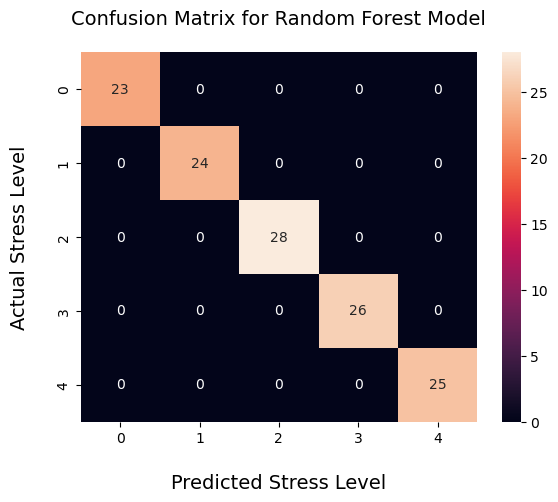

In [50]:
# Print confusion matrix using predicted
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for Random Forest Model", fontsize=14, pad=20)

In [51]:
# Display classification report: f1 score, recall, precision...
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## 4. KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [53]:
# Use GridSearchCV()
params = [{'n_neighbors': [3, 5, 7, 9],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20]}]

# Create a GridSearchCV object with cross-validation
grid_search_knn = GridSearchCV(estimator=knn, param_grid=params, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

# Output the best parameters from gridsearchcv algo
grid_search_knn.best_params_

{'leaf_size': 15, 'n_neighbors': 3, 'weights': 'uniform'}

In [54]:
# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(grid_search_knn, X_train, y_train, cv=kf, scoring="accuracy")

In [55]:
np.mean(accuracies)

1.0

In [56]:
# Now just try fitting model with train and test data
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}])

In [57]:
grid_search_knn.score(X_test, y_test)

1.0

In [58]:
y_pred = grid_search_knn.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for KNN Model')

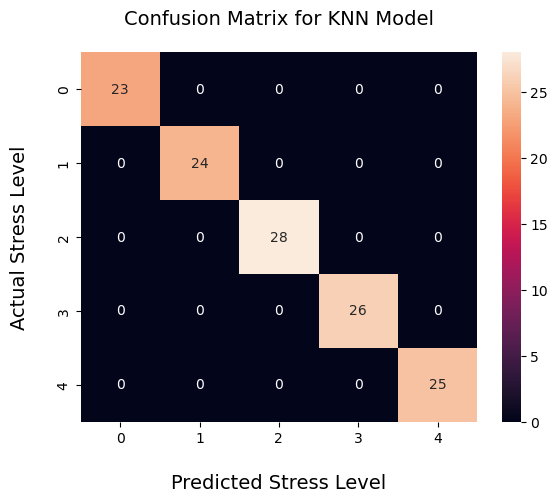

In [59]:
# Print confusion matrix using predicted
cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for KNN Model", fontsize=14, pad=20)

In [60]:
# Display classification report: f1 score, recall, precision...
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## 5. SVM Classifier

In [104]:
from sklearn.svm import SVC

svc = SVC(max_iter = 1000, kernel = 'rbf')

In [105]:
# Cross-validation
# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(svc, X_train, y_train, cv=kf, scoring="accuracy")

In [106]:
np.mean(accuracies)

1.0

In [107]:
# Now just try fitting model with train and test data
svc.fit(X_train, y_train)

SVC(max_iter=1000)

In [108]:
svc.score(X_test, y_test)

1.0

In [109]:
y_pred = svc.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for SVM Model')

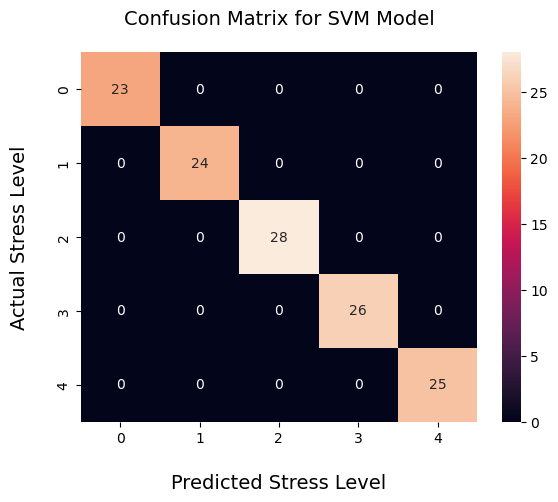

In [110]:
# Print confusion matrix using predicted
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for SVM Model", fontsize=14, pad=20)

In [111]:
# Display classification report: f1 score, recall, precision...
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## 6. Adaboost

In [112]:
# Using RandomizedSearchCV to find best hyperparameters

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform, randint

params = {
    'n_estimators': randint(50, 200),  # Randomly sample n_estimators from 50 to 200
    'learning_rate': uniform(0.01, 1.0),  # Randomly sample learning_rate from 0.01 to 1.0
    'estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

ada = AdaBoostClassifier()

In [113]:
# Create randomized search object
random_search = RandomizedSearchCV(
    ada,
    param_distributions=params,
    n_iter=20,  # Number of random combos to try
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=2
)

In [114]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'estimator': [None,
                                                      DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=2)],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f6527f09630>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f652c057a90>},
                   verbose=2)

In [115]:
best_ada_params = random_search.best_params_
print(best_ada_params)
best_ada_model = random_search.best_estimator_
print(best_ada_model)

{'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.2567367263121657, 'n_estimators': 76}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2567367263121657, n_estimators=76)


In [116]:
# Specify the number of folds
k_folds = 10

# Create a KFold object to specify the cross-validation strategy
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = cross_val_score(best_ada_model, X_train, y_train, cv=kf, scoring="accuracy")

In [117]:
np.mean(accuracies)

0.9560000000000001

In [118]:
best_ada_model.fit(X_train, y_train)
best_ada_model.score(X_test, y_test)

1.0

In [119]:
y_pred = best_ada_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Adaboost Model')

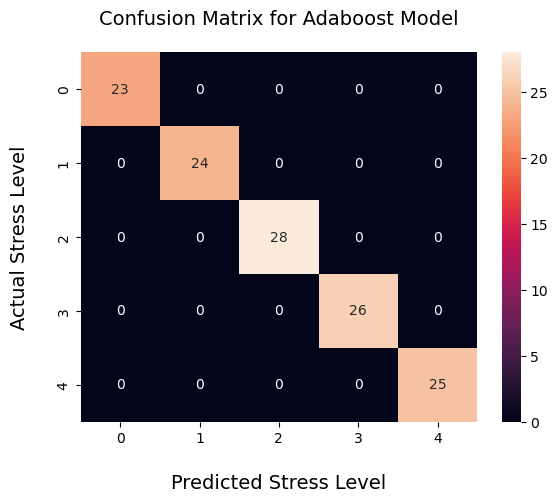

In [120]:
# Print confusion matrix using predicted
cm = confusion_matrix(y_test, y_pred)
plt = sns.heatmap(cm, annot=True)
plt.set_xlabel("Predicted Stress Level", fontsize=14, labelpad=20)
plt.set_ylabel("Actual Stress Level", fontsize=14, labelpad=20)

# Set plot title
plt.set_title("Confusion Matrix for Adaboost Model", fontsize=14, pad=20)

In [121]:
# Display classification report: f1 score, recall, precision...
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Model Comparison

In [124]:
# Create bar plot to visually compare accuracies from cross-validation of all six models

import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'KNN', 'SVM', 'Adaboost']
# Below accuracies are before pca
# accuracies = [0.998, 1.0, 1.0, 1.0, 1.0, 0.847]
accuracies = [0.972, 1.0, 1.0, 1.0, 1.0, 0.956]

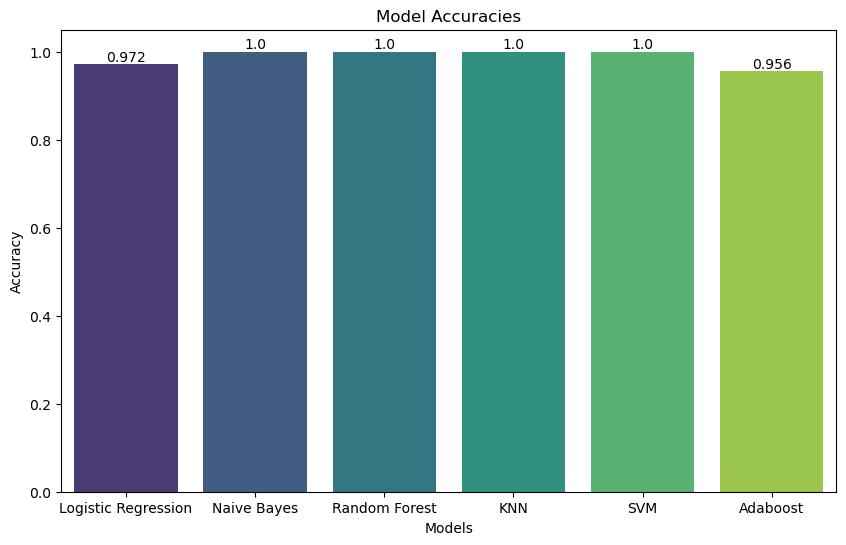

[CV] END estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.020214973688679187, n_estimators=100; total time=   0.5s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.07053812999370655, n_estimators=96; total time=   0.5s
[CV] END estimator=None, learning_rate=0.3258572655810583, n_estimators=135; total time=   0.7s
[CV] END estimator=None, learning_rate=0.3099952378020062, n_estimators=139; total time=   0.6s
[CV] END estimator=None, learning_rate=0.7966745169818306, n_estimators=165; total time=   0.8s
[CV] END estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.6898174193016532, n_estimators=104; total time=   0.5s
[CV] END estimator=None, learning_rate=0.2624766636713751, n_estimators=134; total time=   0.6s
[CV] END estimator=None, learning_rate=0.9870165784107106, n_estimators=129; total time=   0.7s
[CV] END estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5487970873625232, n_estimators=129; total time=   0.6s
[CV] END e

In [125]:
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x=models, y=accuracies, palette='viridis')

plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc}', ha='center', va='bottom')

plt.show()